## Import Library yang digunakan

In [636]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import string
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from IPython.display import display


## Import Data Set dan Concat Data Frame

In [637]:

import pandas as pd

df_train = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_train.csv')
# df_train.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Basic Feature Discovering for Machine Learning\File Dokumentasi\File CSV\titanic_train.csv", index=None, header=True)
# df_train.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Basic Feature Discovering for Machine Learning\File Dokumentasi\File Excel\titanic_train.xlsx", index=None, header=True)

df_test = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_test.csv')
# df_test.to_csv(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Basic Feature Discovering for Machine Learning\File Dokumentasi\File CSV\titanic_test.csv", index=None, header=True)
# df_test.to_excel(r"D:\Usep Syaikal Arifin\Computer Programming\Application File\Application File PT Bukit Makmur Mandiri Utama (BUMA)\Kelas Penerapan di Industri\Basic Feature Discovering for Machine Learning\File Dokumentasi\File Excel\titanic_test.xlsx", index=None, header=True)

display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [638]:
def concat_df(train_data, test_data):
    df_all = pd.concat([train_data, test_data], sort=True).reset_index(drop=True)
    return df_all

df_all = concat_df(df_train, df_test)
display(df_all.head())

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [639]:
df_train.name = "Training Set"
df_test.name = "Test Set"
df_all.name = "All Set" 

dfs = [df_train, df_test]

### Penjelasan dari dataset

PassengerId adalah id pada row, maka tidak ada pengaruh terhadap target yang dicari

Survived adalah target yang akan diprediksi, nilai 0 = Not Survived dan nilai 1 = Survived

Pclass (Passenger Class) adalah kategori level sosial ekonomi penumpang dengan nilai (1, 2 atau 3):
1. 1 = Upper Class
2. 2 = Middle Class
3. 3 = Lower Class

Name, Sex dan Age merupakan data self-explanatory

SibSp adalah jumlah saudara dari penumpang

Parch adalah jumlah Orang Tua dan anak dari penumpang

Ticket adalah jumlah tiket penumpang

Fare adalah tarif yang di kenakan kepada penumpang

Cabin adalah nomor kabin penumpang

Embarked adalah pelabuhan pemberangkatan ada 3 pelabuhan (C, Q atau S):

1. C = Cherbourg
2. Q = Queenstown
3. S = Southampton

In [640]:
df_train = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_train.csv')
df_test = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/challenge/feature-engineering/titanic_test.csv')
df_all = concat_df(df_train, df_test)
df_train.name = "Training Set"
df_test.name = "Test Set"
df_all.name = "All Set" 

dfs = [df_train, df_test]

display(df_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


None

## Exploring Data

In [641]:
print("Number of Training Example = {} Baris {} Kolom".format(df_train.shape[0], df_train.shape[1]))
print("Number of Test Example = {} Baris {} Kolom".format(df_test.shape[0], df_test.shape[1]))
print('Training X Shape = {} Baris & {} Kolom'.format(df_train.shape[0], df_train.shape[1]))
print('Training y Shape = {} Baris\n'.format(df_train['Survived'].shape[0]))
print('Test X Shape = {} Baris & {} Kolom'.format(df_test.shape[0], df_test.shape[1]))
print('Test y Shape = {} Baris\n'.format(df_test.shape[0]))

display(df_train.columns.to_list())
display(df_test.columns.to_list())

Number of Training Example = 891 Baris 12 Kolom
Number of Test Example = 418 Baris 11 Kolom
Training X Shape = 891 Baris & 12 Kolom
Training y Shape = 891 Baris

Test X Shape = 418 Baris & 11 Kolom
Test y Shape = 418 Baris



['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Missing Value dan Contoh data

In [642]:
display(df_train.info(memory_usage=False))
display(df_train.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)

None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Mengetahui Korelasi Fitur

In [643]:
df_train_corr = df_train.corr()
display(df_train_corr)
print(df_train_corr.to_string())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


             PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


## Mengenali missing data dari kolom

In [644]:
    df_train.name = "Training Set"
    df_test.name = "Testing Set"
    df_all.name = "All Set"

    dfs = [df_train, df_test]

    def display_missing(df):
        for col in df.columns.to_list():
            print("{} column missing value = {}".format(col, df[col].isnull().sum()))
        print("\n")

    for df in dfs:
        print("{}".format(df.name))
        display_missing(df)

Training Set
PassengerId column missing value = 0
Survived column missing value = 0
Pclass column missing value = 0
Name column missing value = 0
Sex column missing value = 0
Age column missing value = 177
SibSp column missing value = 0
Parch column missing value = 0
Ticket column missing value = 0
Fare column missing value = 0
Cabin column missing value = 687
Embarked column missing value = 2


Testing Set
PassengerId column missing value = 0
Pclass column missing value = 0
Name column missing value = 0
Sex column missing value = 0
Age column missing value = 86
SibSp column missing value = 0
Parch column missing value = 0
Ticket column missing value = 0
Fare column missing value = 1
Cabin column missing value = 327
Embarked column missing value = 0




## Mencari nilai untuk missing value

In [645]:
age_by_pclass_sex = df_all.groupby(["Sex", "Pclass"])["Age"].median()
display(age_by_pclass_sex)

for pclass in range(1, 4):
    for sex in ["female", "male"]:
        print("Median age of Pclass {} {}s : {}".format(pclass, sex, age_by_pclass_sex[sex][pclass]))

display("Median age of all passengers : {}".format(df_all["Age"].median()))

df_all["Age"] = df_all.groupby(["Sex", "Pclass"])["Age"].apply(lambda x: x.fillna(x.median()))
display(df_all.head())

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

Median age of Pclass 1 females : 36.0
Median age of Pclass 1 males : 42.0
Median age of Pclass 2 females : 28.0
Median age of Pclass 2 males : 29.5
Median age of Pclass 3 females : 22.0
Median age of Pclass 3 males : 25.0


'Median age of all passengers : 28.0'

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## Mengisi Nilai Kosong

In [646]:
df_all["Embarked"] = df_all["Embarked"].fillna("S")
med_fare = df_all.groupby(["Pclass", "Parch", "SibSp"])["Fare"].median()[3][0][0]
display(med_fare)
df_all["Fare"] = df_all["Fare"].fillna(med_fare)

7.8542

## Exploring data

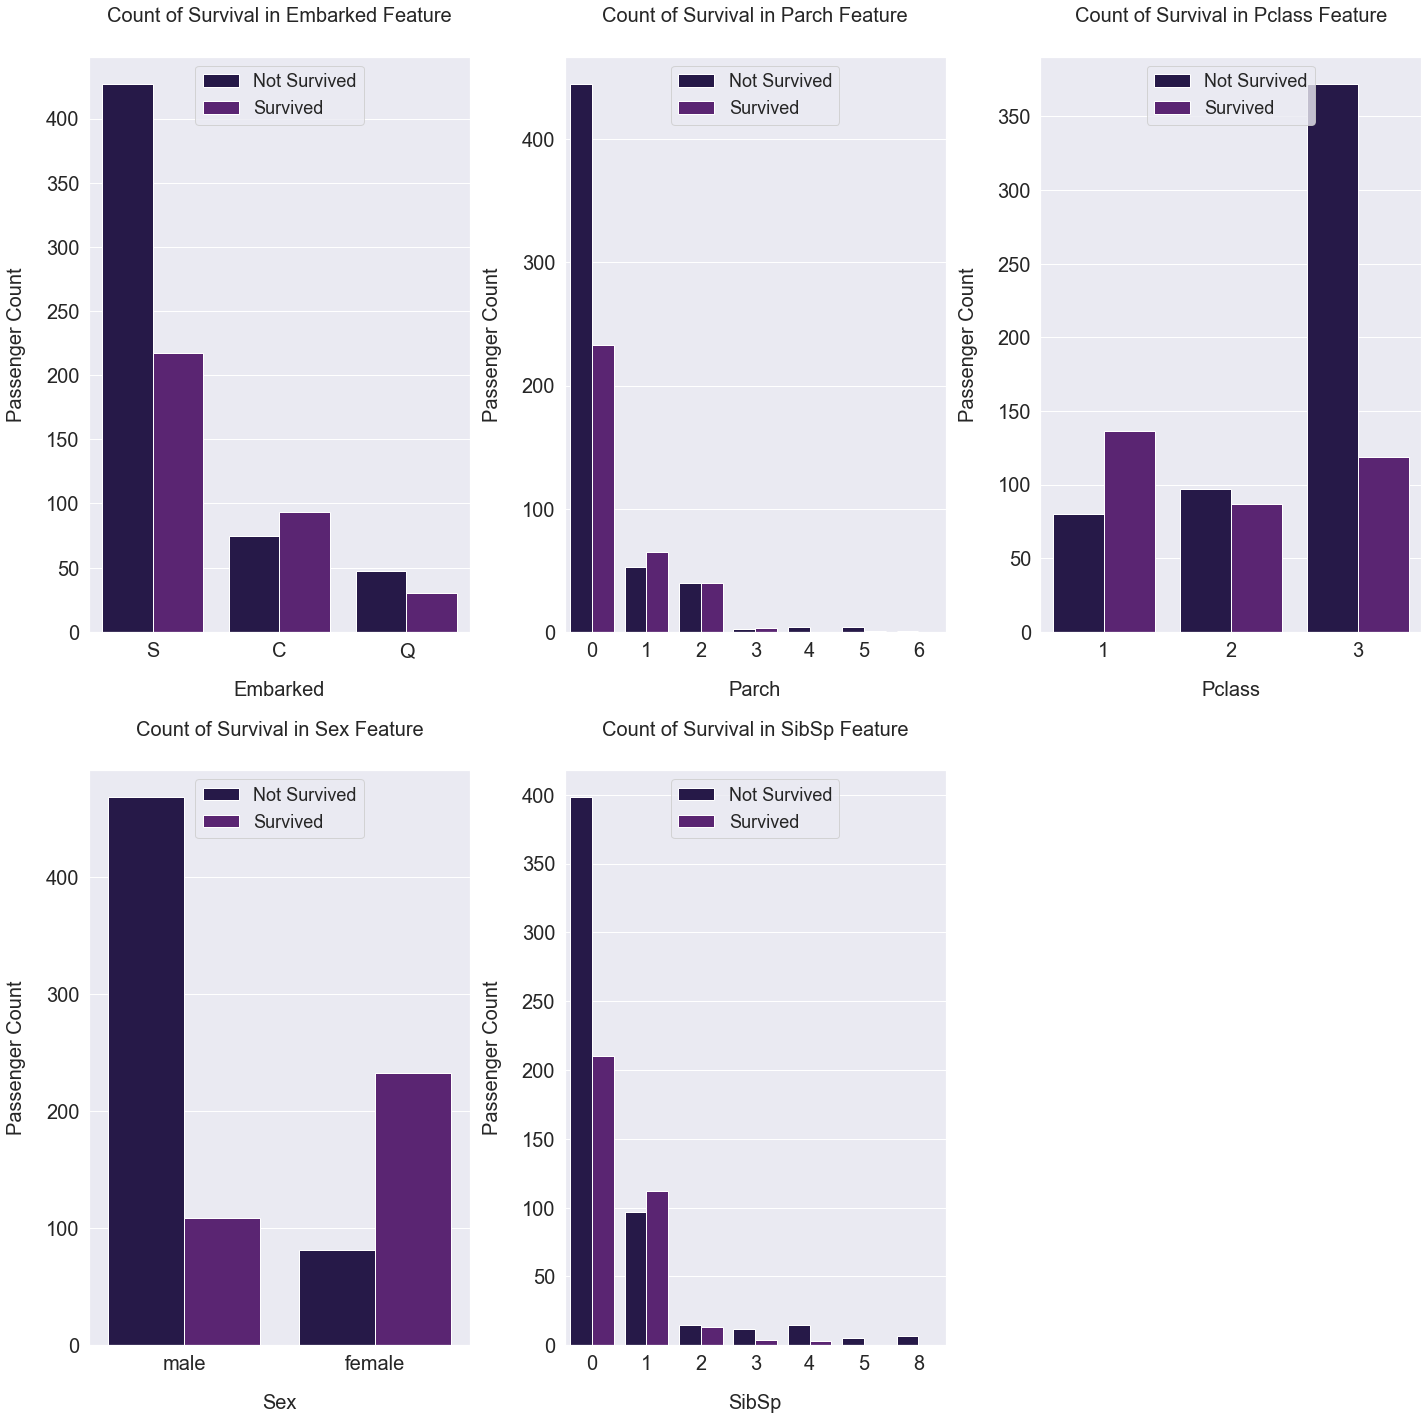

In [647]:
cat_features = ["Embarked", "Parch", "Pclass", "Sex", "SibSp"]
fig, axs = plt.subplots(
                            ncols=2,
                            nrows=3,
                            figsize=(20, 20)
                        )
plt.subplots_adjust(right=1.5, top=1.25)

colors = sns.color_palette("magma")
for i, feature in enumerate(cat_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=feature, hue="Survived", data=df_train, palette=colors)
    plt.xlabel("{}".format(feature), size=20, labelpad=20)
    plt.ylabel("Passenger Count", size=20, labelpad=20)
    plt.tick_params(axis="x", labelsize=20)
    plt.tick_params(axis="y", labelsize=20)
    plt.legend(["Not Survived", "Survived"], loc="upper center", prop = {"size" : 18})
    plt.title("Count of Survival in {} Feature".format(feature), size=20, y=1.05)
plt.tight_layout()
plt.show()

## Exploring data part 2

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


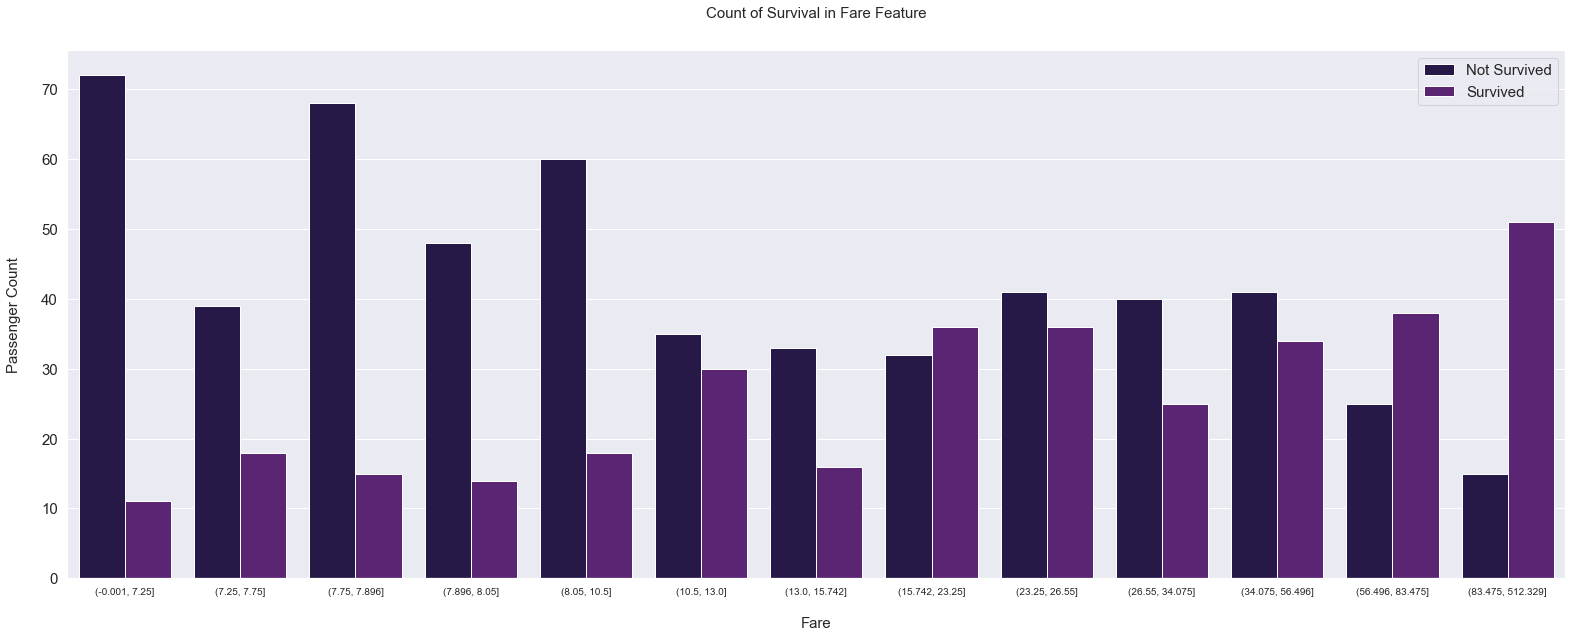

In [648]:
df_all["Fare"] = pd.qcut(df_all["Fare"], 13)
display(df_all.head())
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x="Fare", hue="Survived", data=df_all, palette=colors)
plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.tight_layout()
plt.show()

## Feature Engineering - Part 1

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Group
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone


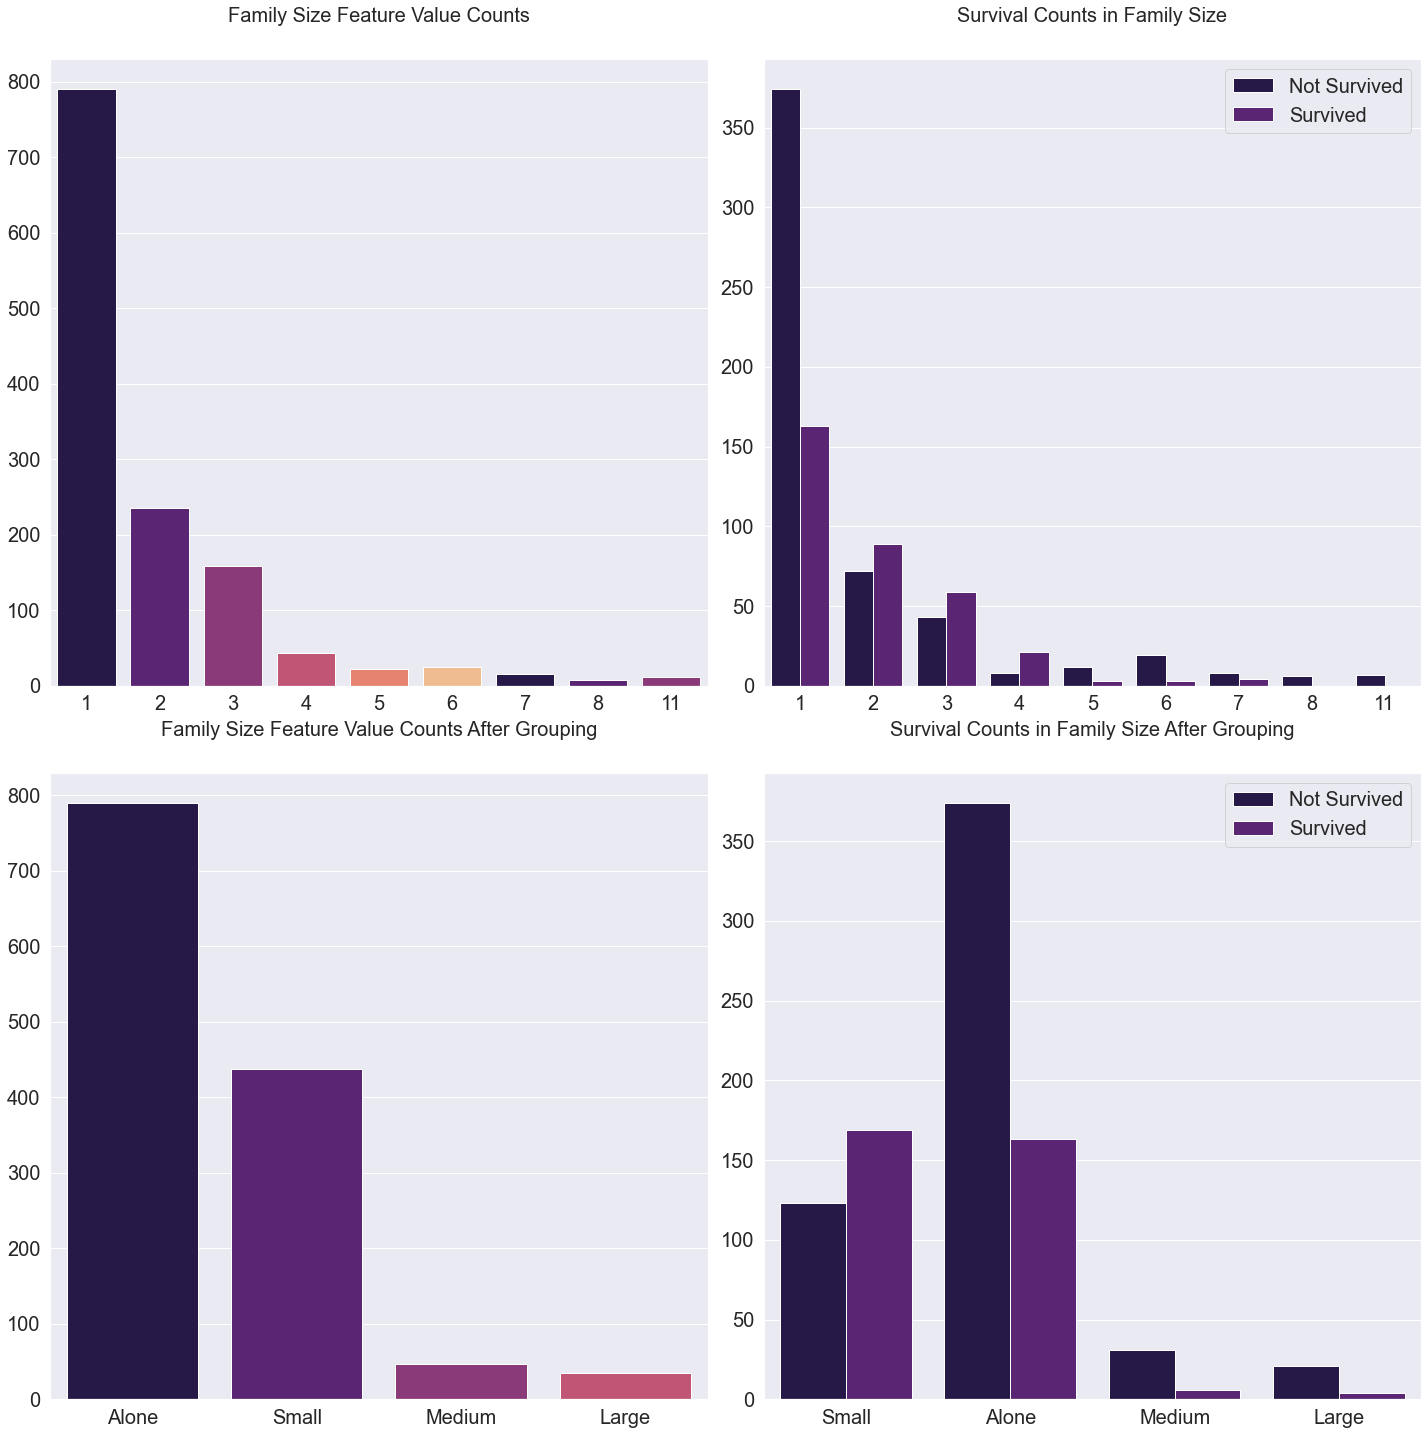

In [649]:
# display(df_all.head())
df_all["Family_Size"] = df_all["SibSp"] + df_all["Parch"] + 1
# display(df_all["Family_Size"].unique())
display(df_all.head())

fig, axs = plt.subplots(figsize=(20, 20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(
            x=df_all["Family_Size"].value_counts().index,
            y=df_all["Family_Size"].value_counts().values,
            ax = axs[0][0],
            palette=colors
           )

sns.countplot(
                x="Family_Size",
                hue="Survived",
                data=df_all,
                ax=axs[0][1],
                palette=colors
             )

axs[0][0].set_title("Family Size Feature Value Counts", size=20, y=1.05)
axs[0][1].set_title("Survival Counts in Family Size", size=20, y=1.05)

family_map = {
                1: 'Alone',
                2: 'Small',
                3: 'Small',
                4: 'Small',
                5: 'Medium',
                6: 'Medium',
                7: 'Large',
                8: 'Large',
                11: 'Large'
             }
df_all["Family_Size_Group"] = df_all["Family_Size"].map(family_map)
display(df_all.head())

sns.barplot(
            x=df_all["Family_Size_Group"].value_counts().index,
            y=df_all["Family_Size_Group"].value_counts().values,
            ax=axs[1][0],
            palette=colors
           )
sns.countplot(
                x="Family_Size_Group",
                hue="Survived",
                data=df_all,
                ax=axs[1][1],
                palette=colors
             )

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=20, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=20, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')

plt.tight_layout()
plt.show()

## Feature Engineering - Part 2

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Group,Ticket_Frequency
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1


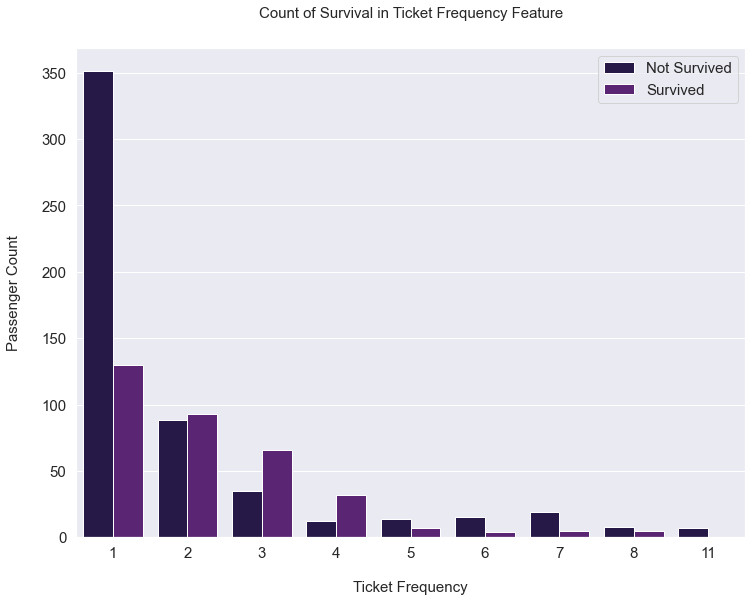

In [650]:
df_all["Ticket_Frequency"] = df_all.groupby("Ticket")["Ticket"].transform("count")
display(df_all.head())

fig, axs = plt.subplots(figsize=(12, 9))
sns.countplot(
                x="Ticket_Frequency",
                hue="Survived",
                data=df_all,
                palette=colors
             )
plt.xlabel("Ticket Frequency", size=15, labelpad=20)
plt.ylabel("Passenger Count", size=15, labelpad=20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.legend(
            ["Not Survived", "Survived"],
            loc="upper right",
            prop={
                    "size" : 15
                   }
          )
plt.title("Count of Survival in {} Feature".format("Ticket Frequency"), size=15, y=1.05)
plt.show()

## Feature Engineering - Part 3

In [651]:
df_all["Title"] = df_all["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
# display(df_all["Title"].unique())

# df_all["Is_Married"] = 0
df_all.loc[df_all["Title"] == "Mrs", "Is_Married"] = int(1)
df_all.loc[df_all["Title"] != "Mrs", "Is_Married"] = int(0)
df_all["Is_Married"] = df_all["Is_Married"].astype("int64")

display(df_all["Title"].unique())
display(df_all.info())

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                1309 non-null   float64 
 1   Cabin              295 non-null    object  
 2   Embarked           1309 non-null   object  
 3   Fare               1309 non-null   category
 4   Name               1309 non-null   object  
 5   Parch              1309 non-null   int64   
 6   PassengerId        1309 non-null   int64   
 7   Pclass             1309 non-null   int64   
 8   Sex                1309 non-null   object  
 9   SibSp              1309 non-null   int64   
 10  Survived           891 non-null    float64 
 11  Ticket             1309 non-null   object  
 12  Family_Size        1309 non-null   int64   
 13  Family_Size_Group  1309 non-null   object  
 14  Ticket_Frequency   1309 non-null   int64   
 15  Title              1309 non-null   object  
 16  Is_Mar

None

## Feature Engineering - Part 4

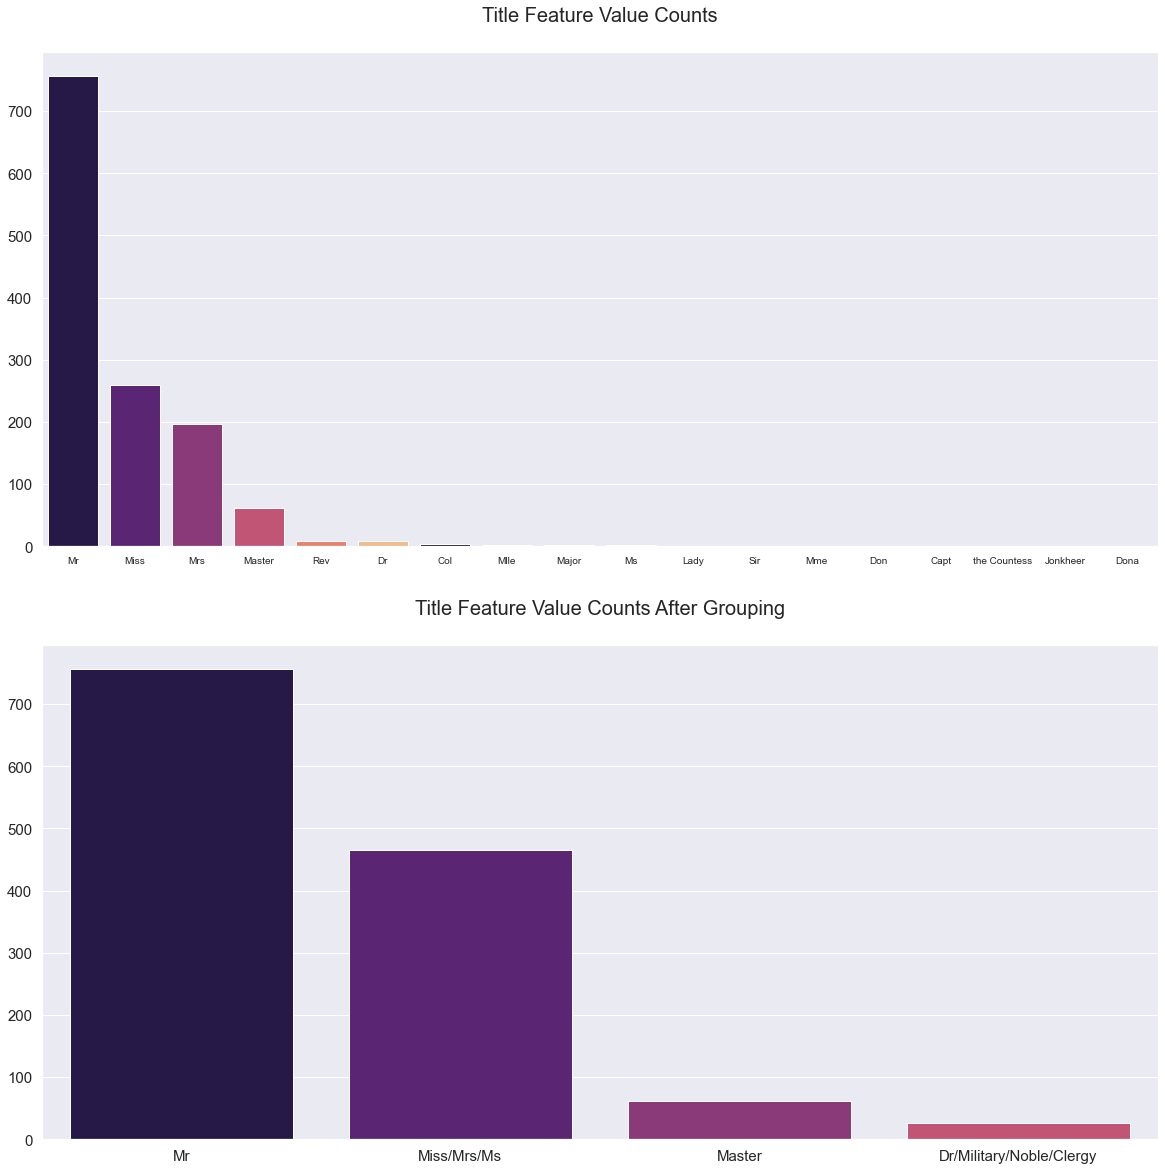

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Group,Ticket_Frequency,Title,Is_Married
0,22.0,NaN,S,"(-0.001, 7.25]","Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr,0
1,38.0,C85,C,"(56.496, 83.475]","Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms,1
2,26.0,NaN,S,"(7.896, 8.05]","Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1,Alone,1,Miss/Mrs/Ms,0
3,35.0,C123,S,"(34.075, 56.496]","Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2,Small,2,Miss/Mrs/Ms,1
4,35.0,NaN,S,"(7.896, 8.05]","Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1,Alone,1,Mr,0


In [652]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(
            x=df_all["Title"].value_counts().index,
            y=df_all["Title"].value_counts().values,
            ax = axs[0],
            palette=colors
           )
axs[0].tick_params(axis="x", labelsize=10)
axs[1].tick_params(axis="x", labelsize=15)

for i in range(2):
    axs[i].tick_params(axis="y", labelsize=15)

axs[0].set_title(
                 "Title Feature Value Counts",
                 size=20,
                 y=1.05
                )

df_all["Title"] = df_all["Title"].replace(
                                            ['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'],
                                            'Miss/Mrs/Ms'
                                         )
df_all["Title"] = df_all["Title"].replace(
                                            ['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'],
                                            'Dr/Military/Noble/Clergy'
                                         )

sns.barplot(
            x=df_all["Title"].value_counts().index,
            y=df_all["Title"].value_counts().values,
            ax=axs[1],
            palette=colors
           )
axs[1].set_title(
                    'Title Feature Value Counts After Grouping',
                    size=20,
                    y=1.05
                )

plt.show()

display(df_all.head())

## Modelling dengan hasil Feature Engineering - Part 1

In [653]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

non_numeric_features = [
                        "Embarked",
                        "Sex",
                        "Title",
                        "Family_Size_Group",
                        "Age",
                        "Fare"
                        ]

for df in dfs:
    for feature in non_numeric_features:
        LE = LabelEncoder()
        df[feature] = LE.fit_transform(df[feature])

cat_features = [
                'Pclass',
                'Sex',
                'Embarked',
                'Title',
                'Family_Size_Group'
               ]
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

C:\Users\MySchool\AppData\Local\Temp/ipykernel_3840/2967287198.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = LE.fit_transform(df[feature])


## Modelling dengan hasil Feature Engineering - Part 2

In [654]:
df_all = concat_df(df_train, df_test)
drop_cols = [
            'Cabin',
            'Embarked',
            'Family_Size',
            'Family_Size_Group',
            'Survived',
            'Name',
            'PassengerId',
            'Pclass',
            'Sex',
            'Ticket',
            'Title']

df_all.drop(columns=drop_cols, inplace=True)

print(df_all.head())

   Age  Embarked_1  Embarked_2  Embarked_3  Family_Size_Group_1  \
0   28         0.0         0.0         1.0                  0.0   
1   52         1.0         0.0         0.0                  0.0   
2   34         0.0         0.0         1.0                  1.0   
3   48         0.0         0.0         1.0                  0.0   
4   48         0.0         0.0         1.0                  1.0   

   Family_Size_Group_2  Family_Size_Group_3  Family_Size_Group_4  Fare  \
0                  0.0                  0.0                  1.0     0   
1                  0.0                  0.0                  1.0    11   
2                  0.0                  0.0                  0.0     3   
3                  0.0                  0.0                  1.0    10   
4                  0.0                  0.0                  0.0     3   

   Is_Married  ...  Pclass_2  Pclass_3  Sex_1  Sex_2  SibSp  Ticket_Frequency  \
0           0  ...       0.0       1.0    0.0    1.0      1            

In [655]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

random_forest = RandomForestClassifier(
                                            criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50
                                      )
random_forest.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

X_train shape: (891, 22)
y_train shape: (891,)
X_test shape: (418, 22)
Scores: [0.83333333 0.87640449 0.76404494 0.87640449 0.84269663 0.80898876
 0.82022472 0.78651685 0.87640449 0.85393258]
Mean: 0.8338951310861423
Standard Deviation: 0.03719055862675359


In [656]:
df_train = df_all.loc[:890]
df_test = df_all.loc[891:]
dfs = [df_train, df_test]

non_numeric_features = [
                        "Embarked",
                        "Sex",
                        "Title",
                        "Family_Size_Group",
                        "Age",
                        "Fare"
                        ]

for df in dfs:
    for feature in non_numeric_features:
        LE = LabelEncoder()
        df[feature] = LE.fit_transform(df[feature])

cat_features = [
                'Pclass',
                'Sex',
                'Embarked',
                'Title',
                'Family_Size_Group'
               ]
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

df_train = pd.concat([df_train, *encoded_features[:5]], axis=1)
df_test = pd.concat([df_test, *encoded_features[5:]], axis=1)

KeyError: 'Embarked'

In [ ]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Family_Size', 'Family_Size_Grouped', 'Survived',
             'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title',
             'Family_Size_Grouped_1', 'Family_Size_Grouped_2', 'Family_Size_Grouped_3', 'Family_Size_Grouped_4',
             'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Is_Married']

df_all.drop(columns=drop_cols, inplace=True)

df_all.head()

X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

KeyError: "['Family_Size_Grouped' 'Family_Size_Grouped_1' 'Family_Size_Grouped_2'\n 'Family_Size_Grouped_3' 'Family_Size_Grouped_4'] not found in axis"

In [ ]:
random_forest = RandomForestClassifier(criterion='gini', 
                                           n_estimators=1100,
                                           max_depth=5,
                                           min_samples_split=4,
                                           min_samples_leaf=5,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=50)
random_forest.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Konklusi:

Feature Engineering mengharuskan kita membuat banyak ide fitur dari data yang sudah ada.

Biasanya yang dapat kita lakukan adalah, penggabungan (grouping), ekstraksi fitur (seperti Title yang didapat dari nama orang), dan masih banyak lagi.

Jangan malas untuk melakukan feature engineering dan mencoba segala sesuatu yang ada di pikiran kita. Barangkali ini dapat meningkatkan akurasi model kita.